In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import cross_val_score

import pickle

# Reading the data

In [262]:
df= pd.read_csv('./dataset.csv',)
df.drop(columns='fnlwgt')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [263]:
df= df.drop(columns='fnlwgt')


In [264]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

checking for null values

In [265]:
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [266]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [267]:
df.shape

(32561, 14)

In [268]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

#dropping rows in columns occupation and workclass which have '?' in it

In [269]:
df_new=df.drop(df[(df['occupation'] == '?') & (df['workclass'] =='?')].index)
df_new=df_new.drop(df_new[(df_new['native.country']== '?')].index)
df_new.shape

(30169, 14)

In [270]:
df_new.occupation.dtype

dtype('O')

In [271]:
df_new.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv', '?'], dtype=object)

In [272]:
df_new=df_new.drop(df_new[(df_new['occupation'] == '?')].index)
df_new.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [273]:
inputs = df_new.drop("income", axis="columns")
inputs.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [274]:
target = df_new["income"]
target.unique()


array(['<=50K', '>50K'], dtype=object)

In [275]:
# here income less than 50 K is rreplaced with 0 and income more than 50  K is replaced with 1.
target=target.replace({'<=50K': 0,'>50K' : 1})
target.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [276]:
inputs.shape

(30162, 13)

In [277]:
target.shape

(30162,)

In [278]:
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_occupation= LabelEncoder()
le_marital_status = LabelEncoder()

le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex= LabelEncoder()
le_native_country= LabelEncoder()
#le_target= LabelEncoder()


inputs["workclass"] = le_workclass.fit_transform(inputs["workclass"])
inputs["education"] = le_education.fit_transform(inputs["education"])
inputs["marital.status"] = le_marital_status.fit_transform(inputs["marital.status"])
inputs["occupation"] = le_occupation.fit_transform(inputs["occupation"])
inputs["relationship"] = le_relationship.fit_transform(inputs["relationship"])
inputs["race"] = le_race.fit_transform(inputs["race"])
inputs["sex"] = le_sex.fit_transform(inputs["sex"])
inputs["native.country"] = le_native_country.fit_transform(inputs["native.country"])
#arget["income"] = le_target.fit_transform(target["income"])


In [279]:
# See classes for each encoder

encoders = [le_workclass,le_education, le_occupation, le_marital_status,le_relationship,le_relationship,le_race,le_sex,le_native_country]
for encoder in encoders:
    
    encoding= {}

    for i in list(encoder.classes_):
        encoding[i] = encoder.transform([i])[0]
        
    print(encoding)

{'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6}
{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'A

In [280]:
# Split in Train and Test data
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [281]:
# Build the model

model = RandomForestClassifier(n_estimators=20) # n_estimators= number of trees
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [282]:
# Get the score
model.score(X_test, y_test)

0.843858776727996

#Same above process can be optimized using function to calculate csore for several machine learning models:

In [283]:
def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test)


print("LR:",get_score(LogisticRegression(),X_train, y_train, X_test, y_test ))
print("SVM:",get_score(SVC(),X_train, y_train, X_test, y_test ))
print("RF:",get_score(RandomForestClassifier(),X_train, y_train, X_test, y_test ))
print("DT:",get_score(tree.DecisionTreeClassifier(),X_train, y_train, X_test, y_test ))

c:\Python3104\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.7971158627548484
SVM: 0.7933034974307973
RF: 0.8501574672633847
DT: 0.8060666335156639


#It looks like Random forest has the best score

#Using Cross Validation to compare several machine learning models

In [284]:
NUM_OF_CROSS_VALIDATION = 10

In [285]:
print(cross_val_score(SVC(), inputs, target, cv = NUM_OF_CROSS_VALIDATION))
print(cross_val_score(LogisticRegression(), inputs, target, cv = NUM_OF_CROSS_VALIDATION))

print(cross_val_score(RandomForestClassifier(), inputs,target, cv = NUM_OF_CROSS_VALIDATION))
print(cross_val_score(tree.DecisionTreeClassifier(), inputs,target, cv = NUM_OF_CROSS_VALIDATION))

[0.47795824 0.81040769 0.76027851 0.75132626 0.75099469 0.75099469
 0.75099469 0.75099469 0.75099469 0.75099469]


c:\Python3104\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python3104\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

[0.52137885 0.94796155 0.90649867 0.76823607 0.75132626 0.75629973
 0.75994695 0.76061008 0.7622679  0.7622679 ]
[0.57573749 0.91746768 0.69462865 0.79343501 0.80570292 0.80437666
 0.82460212 0.816313   0.82891247 0.80470822]
[0.53960888 0.86841233 0.74701592 0.7622679  0.77254642 0.77884615
 0.78017241 0.78348806 0.79409814 0.76127321]


In [286]:
# Adjust different Hyper Parameters and get the scores
score_1 = cross_val_score(RandomForestClassifier(n_estimators=5), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_2 = cross_val_score(RandomForestClassifier(n_estimators=10), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_3 = cross_val_score(RandomForestClassifier(n_estimators=15), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_4 = cross_val_score(RandomForestClassifier(n_estimators=20), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_5 = cross_val_score(RandomForestClassifier(n_estimators=30), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_6 = cross_val_score(RandomForestClassifier(n_estimators=40), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
score_7 = cross_val_score(RandomForestClassifier(n_estimators=50), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
#score_8 = cross_val_score(RandomForestClassifier(n_estimators=100), inputs, target, cv = NUM_OF_CROSS_VALIDATION)

In [287]:
# Calculate the average of the different cross validation scores for each model
print(np.average(score_1))
print(np.average(score_2))
print(np.average(score_3))
print(np.average(score_4))
print(np.average(score_5))
print(np.average(score_6))
print(np.average(score_7))

0.7774380302072517
0.7825766171183806
0.7889422142782412
0.7841015962595689
0.7874831854680242
0.785693317003822
0.788809456404864


In [288]:
score_8 = cross_val_score(RandomForestClassifier(n_estimators=100), inputs, target, cv = NUM_OF_CROSS_VALIDATION)
print(np.average(score_7))

0.788809456404864


In [291]:
# Use the model for predictions
y_predicted = model.predict(X_test)

Text(114.0, 0.5, 'True Data')

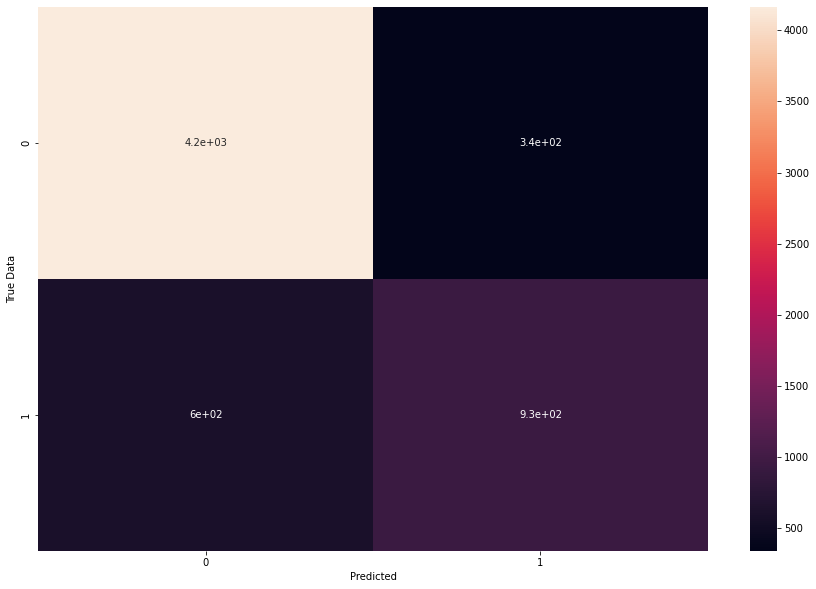

In [292]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True)

plt.xlabel("Predicted")
plt.ylabel("True Data")

In [290]:
# Save the model with Random forest model 

import pickle

with open("models/model_random_forest.pkl", "wb" ) as file:
    pickle.dump(model, file)